In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
plt.rc('hatch', color='k', linewidth=4)
from utils.plotting_styles import plt_styles

with open('data/N2_dissociation_results.json', 'r') as infile:
    import json
    N2_diagnostics = json.load(infile)

CS_entropy       = np.array(N2_diagnostics['entropies']['CS-DD (5q)'])
CE_mp2           = np.array(N2_diagnostics['entropies']['MP2'])
CE_cisd          = np.array(N2_diagnostics['entropies']['CISD'])
CE_ccsd          = np.array(N2_diagnostics['entropies']['CCSD'])
CE_fci           = np.array(N2_diagnostics['entropies']['FCI'])
CE_casci42       = np.array(N2_diagnostics['entropies']['CASCI(4,2)'])
CE_casci54       = np.array(N2_diagnostics['entropies']['CASCI(5,4)'])
CE_casci66       = np.array(N2_diagnostics['entropies']['CASCI(6,6)'])
CE_casci78       = np.array(N2_diagnostics['entropies']['CASCI(7,8)'])
CE_casscf42      = np.array(N2_diagnostics['entropies']['CASSCF(4,2)'])
CE_casscf54      = np.array(N2_diagnostics['entropies']['CASSCF(5,4)'])
CE_casscf66      = np.array(N2_diagnostics['entropies']['CASSCF(6,6)'])
CE_casscf78      = np.array(N2_diagnostics['entropies']['CASSCF(7,8)'])
D1               = np.array(N2_diagnostics['D1'])
T1               = np.array(N2_diagnostics['T1'])
seps_diagnostics = np.array(N2_diagnostics['bond_lengths'])

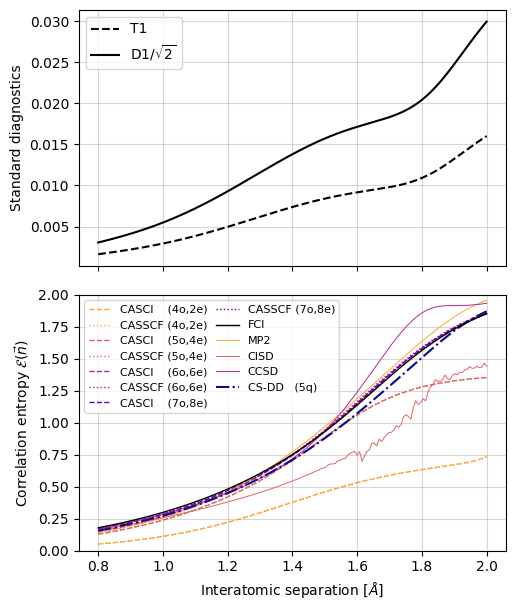

In [4]:
scale=1.15
fig, axes = plt.subplots(2,1,figsize=(5,6),gridspec_kw={'height_ratios':(1,1)}, sharex=True)
fig.tight_layout()

axes[0].plot(seps_diagnostics, T1, label='T1', color='black', ls='--')
axes[0].plot(seps_diagnostics, D1/np.sqrt(2), label='D1$/\sqrt{2}$', color='black', ls='-')
axes[0].set_ylabel('Standard diagnostics')
axes[0].legend()

axes[1].plot(seps_diagnostics, CE_casci42, **plt_styles['CASCI(4,2)'])
axes[1].plot(seps_diagnostics, CE_casscf42, **plt_styles['CASSCF(4,2)'])
axes[1].plot(seps_diagnostics, CE_casci54, **plt_styles['CASCI(5,4)'])
axes[1].plot(seps_diagnostics, CE_casscf54, **plt_styles['CASSCF(5,4)'])
axes[1].plot(seps_diagnostics, CE_casci66, **plt_styles['CASCI(6,6)'])
axes[1].plot(seps_diagnostics, CE_casscf66, **plt_styles['CASSCF(6,6)'])
axes[1].plot(seps_diagnostics, CE_casci78, **plt_styles['CASCI(7,8)'])
axes[1].plot(seps_diagnostics, CE_casscf78, **plt_styles['CASSCF(7,8)'])
axes[1].plot(seps_diagnostics, CE_fci,  **plt_styles['FCI'])
axes[1].plot(seps_diagnostics, CE_mp2, **plt_styles['MP2'])
axes[1].plot(seps_diagnostics, CE_cisd, **plt_styles['CISD'])
axes[1].plot(seps_diagnostics, CE_ccsd, **plt_styles['CCSD'])
axes[1].plot(seps_diagnostics, CS_entropy,  color=plt_styles['CS']['color'], label='CS-DD   (5q)', ls='-.')

axes[1].set_ylabel('Correlation entropy $\\mathcal{E}(\\vec{n})$')
axes[1].legend(loc='upper left', ncol=2, fontsize=8, columnspacing=0.8)
axes[1].set_ylim([0,2])


axes[0].grid(alpha=0.5)
axes[1].grid(alpha=0.5)
axes[1].set_xlabel('Interatomic separation [$\AA$]')
fig.savefig(f'plots/N2_corr_diagnostics.png', dpi=300, bbox_inches='tight', transparent=True)